# <center>AI SATURDAYS DONOSTIA 2020<center>
## <center>Proyecto Práctico Equipo "FACEMOOD"</center>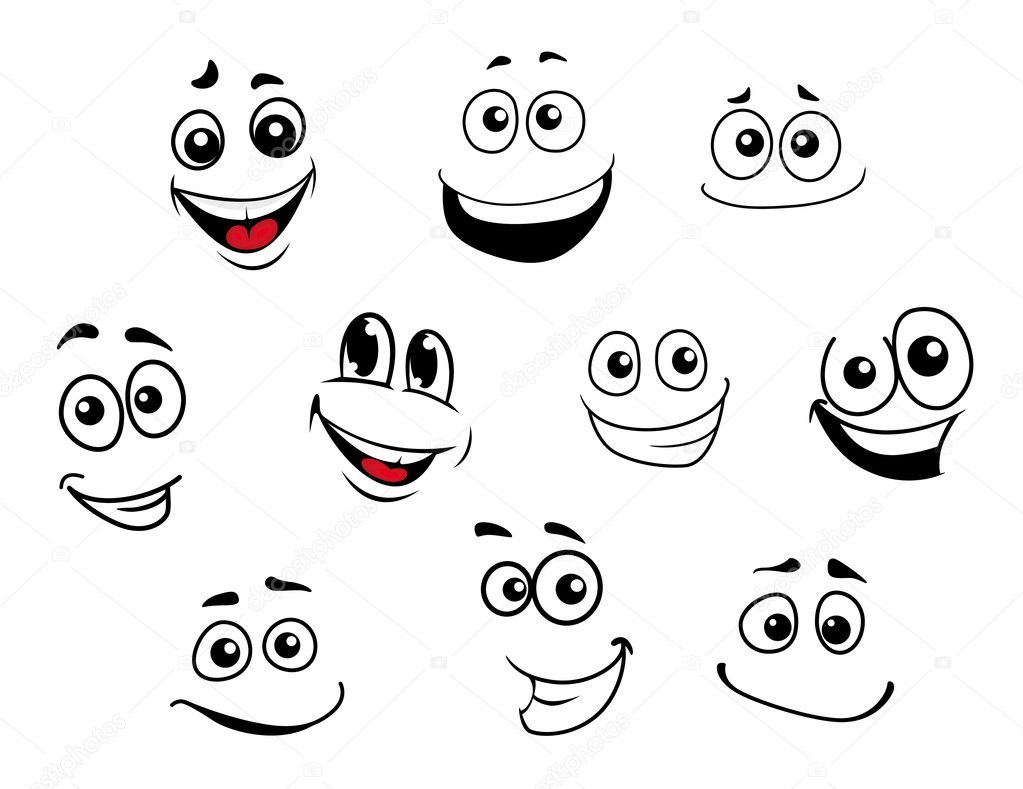

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from main_functions import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Conjunto de Datos

In [85]:
df = pd.read_csv('../processed-data/tidy_socialmedia_data.csv', index_col=0)
df.drop('full_count', axis=1, inplace=True)
df.head()

,Participant,Date,Day,Time,Session.Name,Notification.No,LifePak.Download.No,Responded,Completed.Session,Session.Instance,Session.Instance.Response.Lapse,Reminders.Delivered,Fatigue,LowMood,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress,PSMU,News,ASMU
1,115091,2017-05-02,Tuesday,10:00:06,Daily questions,1,1,1,1,1.0,00:00:06,0,61.0,55.0,61.0,64.0,68.0,50.0,56.0,73.0,66.0,39.0,38.0
2,115091,2017-05-02,Tuesday,12:02:48,Daily questions,2,1,1,1,2.0,00:02:48,0,28.0,59.0,57.0,70.0,58.0,37.0,56.0,67.0,0.0,27.0,23.0
3,115091,2017-05-02,Tuesday,14:03:02,Daily questions,3,1,1,1,3.0,00:03:02,0,24.0,20.0,44.0,70.0,67.0,26.0,38.0,39.0,63.0,34.0,36.0
4,115091,2017-05-02,Tuesday,16:34:28,Daily questions,4,1,1,1,4.0,00:34:28,0,63.0,25.0,56.0,79.0,89.0,30.0,20.0,60.0,67.0,29.0,23.0
6,115091,2017-05-02,Tuesday,20:02:12,Daily questions,6,1,1,1,5.0,00:02:12,0,16.0,22.0,0.0,27.0,83.0,15.0,3.0,25.0,16.0,0.0,0.0


### Las 11 variables estudiadas (8 relacionadas a "depresión" y 3 relacionadas al uso de "Redes Sociales")

In [86]:
df2 = df.iloc[:,12:]
df2.head()

,Fatigue,LowMood,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress,PSMU,News,ASMU
1,61.0,55.0,61.0,64.0,68.0,50.0,56.0,73.0,66.0,39.0,38.0
2,28.0,59.0,57.0,70.0,58.0,37.0,56.0,67.0,0.0,27.0,23.0
3,24.0,20.0,44.0,70.0,67.0,26.0,38.0,39.0,63.0,34.0,36.0
4,63.0,25.0,56.0,79.0,89.0,30.0,20.0,60.0,67.0,29.0,23.0
6,16.0,22.0,0.0,27.0,83.0,15.0,3.0,25.0,16.0,0.0,0.0


### Estadísticas básicas de las 11 variables

In [87]:
df2.describe()

,Fatigue,LowMood,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress,PSMU,News,ASMU
count,8652.000000,8647.000000,8646.000000,8643.000000,8646.000000,8646.000000,8649.000000,8648.000000,8644.000000,8647.000000,8645.000000
mean,36.987171,13.150919,11.971085,26.389795,25.501619,10.583854,12.023124,20.639801,31.604350,20.804788,21.410642
std,29.717460,18.278325,16.962882,26.086166,26.272407,15.485521,16.733406,23.184786,29.214782,24.890481,25.321793
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,6.000000,5.000000,19.000000,18.000000,3.000000,5.000000,14.000000,24.000000,12.000000,12.000000
75%,64.000000,20.000000,18.000000,45.000000,40.000000,17.000000,19.000000,30.000000,61.000000,31.000000,33.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


### Gráficas de Dispersión en formato de Diagrama de Matriz de las 11 Variables

In [78]:
# g = sns.PairGrid(df2)
# g.map(sns.scatterplot)

### Medianas por participante

In [79]:
dfmedian=df.groupby('Participant').median()
dfmedian=dfmedian.iloc[:,6:]

### Estadísticas descriptivas de las Medianas por participante

In [80]:
dfmedian.describe()

,Fatigue,LowMood,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress,PSMU,News,ASMU
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.00000,125.000000,125.000000
mean,35.012000,9.120000,8.804000,20.460000,19.576000,7.948000,8.624000,16.052000,27.94400,15.816000,17.008000
std,23.915886,10.721624,10.533911,17.560563,17.982749,10.314769,10.853804,16.152227,22.67381,18.610561,19.320825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,4.500000,2.000000,0.000000,0.000000,0.000000,10.50000,0.000000,0.000000
50%,31.000000,6.000000,6.000000,19.000000,18.000000,2.000000,3.000000,14.000000,23.50000,11.000000,13.500000
75%,58.000000,17.000000,16.000000,28.000000,28.000000,14.000000,15.000000,23.000000,43.50000,22.000000,24.500000
max,83.000000,55.000000,55.000000,73.000000,72.000000,54.000000,54.000000,64.000000,77.00000,76.000000,79.500000


### Diagrama de Matriz para las Medianas de las 11 Variables

In [52]:
# printMatrixDiagram(dfmedian)

### Correlaciones de Pearson para las Medianas de las 11 Variables

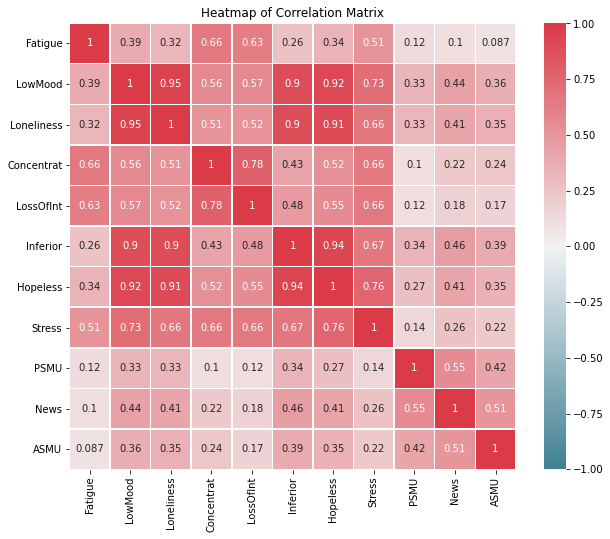

In [9]:
printPearsonCorrelations(dfmedian)

### Se observan correlaciones más significativas entre las siguientes variables:
LowMood vs Loneliness

LowMood vs Inferior

LowMood vs Hopeless

LowMood vs Stress

Loneliness vs Inferior (89,7%)

Loneliness vs Hopeless (91,1%)

Concentrat vs LossOfInt 

Inferior vs Hopeless (93,8%)

Hopeless vs Stress

### Regresión Lineal para las Medianas: y = DeprMood, X = Demás Variables

In [81]:
dfmedian=df.groupby('Participant').median()
dfmedian=dfmedian.iloc[:,6:]
# Split the 'features' and 'income' data into training and testing sets
label = dfmedian.LowMood

dfmedian.drop('LowMood', axis=1, inplace=True)

dfmedian.drop('Inferior', axis=1, inplace=True)       # Muy correlacionado con Loneliness (>90%)
dfmedian.drop('Hopeless', axis=1, inplace=True)       # Muy correlacionado con Loneliness (>90%)

In [82]:
resultsummary = pd.DataFrame(data={'iteration': [], 'intercept': [], 'RMSE_Training': [], 'RMSE_Testing': [],
                                   'R2_Training': [],'R2_Testing': [],'p_value_max':[],'removed_var':[]})
# data_list_medianas = [X_train, X_test, y_train, y_test, standardized_residuals, fitt, result]
# acceso a X_train -> data_list_medianas[0], acceso a y_train -> data_list_medianas[2], 
data_list_medianas = calculateRegression(dfmedian,label,resultsummary, alpha=0.14)

   iteration  intercept  RMSE_Training  RMSE_Testing  R2_Training  R2_Testing  \
0        0.0     -1.267          2.704         4.204        0.936       0.848   
1        1.0     -1.041          2.718         4.157        0.935       0.851   
2        2.0     -1.040          2.719         4.139        0.935       0.853   
3        3.0     -0.675          2.744         4.150        0.934       0.852   
4        4.0     -0.822          2.758         4.041        0.933       0.859   
5        5.0     -0.523          2.805         4.144        0.931       0.852   

   p_value_max removed_var  
0        0.866        PSMU  
1        0.786  Concentrat  
2        0.651     Fatigue  
3        0.146        ASMU  
4        0.212        News  
5        0.068           -  

Modelo Final
['Loneliness', 'LossOfInt', 'Stress']
[0.88876035 0.04602871 0.06911447] -0.5232605721393213
R2 Coefficient for Linear Regression Model with Training Data: 0.931
R2 Coefficient for Linear Regression Model with Testi

### Modelo Final Medianas

### Conclusión: El coeficiente de determinación (R2) del modelo ajustado para las "medianas" es alto (85,2%), indicando que el ajuste puede ser considerado aceptable bajo un punto de vista estadístico.
### LowMood = -0,52 + 0,89 Loneliness + 0,05 LossOfInt + 0,07 Stress

###    

### Medias por participante

In [70]:
dfmean=df.groupby('Participant').mean()
dfmean=dfmean.iloc[:,6:]
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(dfmean)
print(dfmean.shape)

               Fatigue    LowMood  Loneliness  Concentrat  LossOfInt  \
Participant                                                            
115091       45.155844  20.454545   23.285714   37.272727  47.675325   
131183       36.288136   3.474576    0.389831   19.508475  14.508475   
438907       51.040816  26.285714   21.833333   35.729167  50.979592   
515070       34.865385  12.692308   14.076923   32.903846  16.038462   
572172       18.272727  10.738636    9.375000   14.352273  25.761364   
680605       60.894737  14.915789    3.663158   46.852632  37.473684   
696084       46.555556  12.083333   13.263889   35.333333  34.083333   
697356        3.870370   1.259259    0.240741    1.814815   0.833333   
857523       31.365591  21.419355   20.645161   24.677419  23.741935   
883656       32.325843  17.696629   18.887640   21.370787  24.820225   
1102830      28.957447   3.382979    1.702128   22.702128  21.106383   
1156365      15.303371  11.460674   11.213483   12.741573  12.28

### Estadísticas descriptivas de las Medias por participante

In [71]:
dfmean.describe()

,Fatigue,LowMood,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress,PSMU,News,ASMU
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,37.066547,13.015210,11.900892,26.568285,25.175316,10.360674,11.852346,20.555942,31.265974,20.329226,21.265517
std,17.373640,11.226345,11.066729,14.376593,14.705502,10.527341,10.889494,14.524215,14.071410,15.665447,15.387645
min,0.802469,0.000000,0.000000,0.474359,0.407407,0.000000,0.000000,0.180556,3.342857,0.308642,0.314815
25%,24.202532,3.227848,2.176471,15.574713,13.000000,1.319149,2.945946,8.222222,21.041667,6.705882,9.189189
50%,38.150000,11.185185,9.140625,25.810127,24.543478,6.448276,8.690909,19.634921,30.159420,16.566265,20.867647
75%,49.244186,21.173913,19.063492,35.333333,34.872340,17.231884,18.049383,32.277108,38.915493,31.017241,28.971831
max,78.378947,54.141176,53.788235,70.562500,70.224138,52.658824,52.952941,61.482353,75.413043,72.393939,77.863636


### Diagrama de Matriz para las Medias de las 11 Variables

In [221]:
# printMatrixDiagram(dfmean)

### Diferencias entre Medias y Medianas

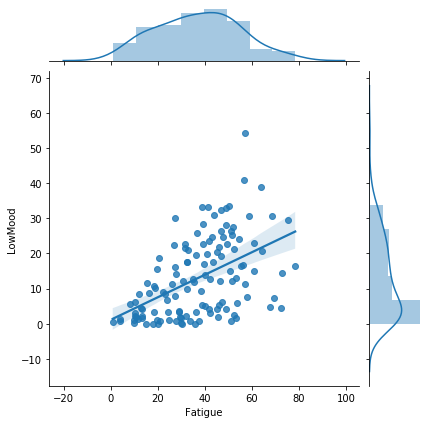

In [222]:
gridA = sns.JointGrid(x="Fatigue", y="LowMood", data=dfmean, height=6)
gridA=gridA.plot_joint(sns.regplot)
gridA = gridA.plot_marginals(sns.distplot)

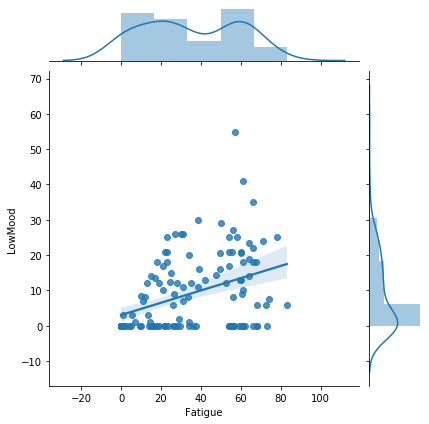

In [223]:
dfmedian=df.groupby('Participant').median()
gridA = sns.JointGrid(x="Fatigue", y="LowMood", data=dfmedian, height=6)
gridA=gridA.plot_joint(sns.regplot)
gridA = gridA.plot_marginals(sns.distplot)

### Correlaciones de Pearson para las Medias de las 11 Variables

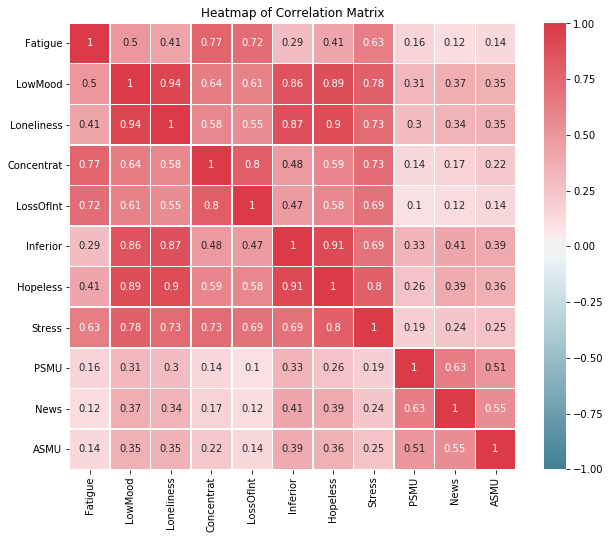

In [224]:
printPearsonCorrelations(dfmean)

### Se observan correlaciones más significativas entre las siguientes variables:

Fatigue vs Concentrat

Fatigue vs LossOfInt

LowMood vs Loneliness

LowMood vs Inferior

LowMood vs Hopeless

LowMood vs Stress

Loneliness vs Inferior

Loneliness vs Hopeless (90,3%)

Loneliness vs Stress

Concentrat vs LossOfInt 

Inferior vs Hopeless (90,7%)

Hopeless vs Stress

### Regresión Lineal para las Medias: y = DeprMood, X = Demás Variables

In [72]:
dfmean=df.groupby('Participant').mean()
dfmean=dfmean.iloc[:,6:]

# Split the 'features' and 'income' data into training and testing sets
label = dfmean.LowMood
dfmean.drop('LowMood', axis=1, inplace=True)
dfmean.drop('Hopeless', axis=1, inplace=True)        # Muy correlacionado con Loneliness & Inferior (>90%)

### Proceso de eliminación de variables X que no contribuyen significativamente para explicar y

In [73]:
resultsummary = pd.DataFrame(data={'iteration': [], 'intercept': [], 'RMSE_Training': [], 'RMSE_Testing': [],
                                   'R2_Training': [],'R2_Testing': [],'p_value_max':[],'removed_var':[]})
# data_list_medias = [X_train, X_test, y_train, y_test, standardized_residuals, fitt, result]
# acceso a X_train -> data_list_medias[0], acceso a y_train -> data_list_medias[2], 
data_list_medias = calculateRegression(dfmean,label,resultsummary, alpha=0.14)

   iteration  intercept  RMSE_Training  RMSE_Testing  R2_Training  R2_Testing  \
0        0.0     -1.628          3.254         3.815        0.915       0.885   
1        1.0     -1.623          3.254         3.814        0.915       0.885   
2        2.0     -1.438          3.256         3.809        0.915       0.885   
3        3.0     -1.359          3.265         3.785        0.915       0.887   
4        4.0     -1.281          3.299         4.111        0.913       0.866   
5        5.0     -0.341          3.347         4.132        0.910       0.865   
6        6.0     -0.634          3.366         4.009        0.909       0.873   

   p_value_max removed_var  
0        0.878  Concentrat  
1        0.671        PSMU  
2        0.628   LossOfInt  
3        0.189    Inferior  
4        0.308     Fatigue  
5        0.194        ASMU  
6        0.133           -  

Modelo Final
['Loneliness', 'Stress', 'News']
[0.78608676 0.17296278 0.03979688] -0.6337034002841335
R2 Coefficient fo

### Análisis de Residuos Modelo Final

In [56]:
print(data_list_medias[0])

             Loneliness     Stress       News
Participant                                  
6226044       21.111111  54.876543   0.308642
6203827        4.542857  10.285714   1.114286
3885552       33.789474  33.245614  33.473684
6300494       15.574074  26.666667  42.092593
9873359        4.964706   3.929412   2.447059
...                 ...        ...        ...
3259101        0.775862   9.105263  26.017544
8893858        7.050633  10.594937  11.544304
1156365       11.213483  12.056180  32.292135
8090378       18.333333  34.633333  25.483333
4348581        3.035714   4.714286  15.083333

[100 rows x 3 columns]


Text(0.5, 1.0, 'Gráfica de Residuos')

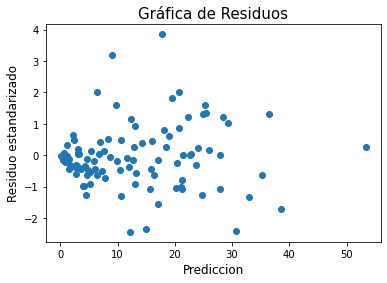

In [57]:
#create instance of influence
# influence = fitt.get_influence()

#standardized residuals
# standardized_residuals = influence.resid_studentized_internal

#studentized residuals
# studentized_residuals = influence.resid_studentized_external

# print(fitt.summary())
# print(fitt.predict())
# print(standardized_residuals)

plt.scatter(data_list_medias[5].predict(), data_list_medias[4])
plt.xlabel('Prediccion', fontsize=12)
plt.ylabel('Residuo estandarizado', fontsize=12)
plt.title('Gráfica de Residuos', fontsize=15)

Text(0.5, 1.0, 'Histograma Residuos Estandarizados')

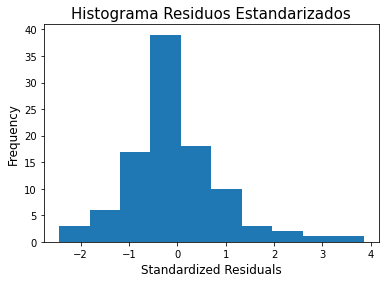

In [58]:
plt.hist(data_list_medias[4])
plt.xlabel('Standardized Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histograma Residuos Estandarizados', fontsize=15)

Text(0.5, 1.0, 'Normal Q-Q Plot')

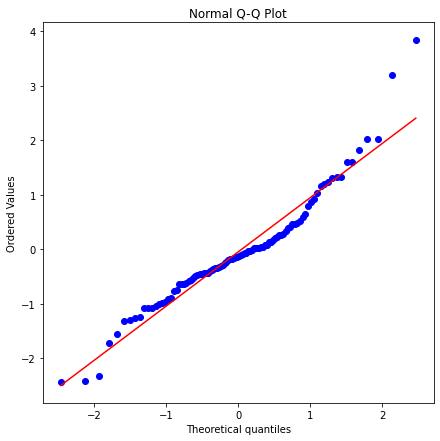

In [59]:
!pip install scipy
from scipy import stats

plt.figure(figsize=(7,7))
stats.probplot(data_list_medias[4], dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

### Se observan 2 outliers en el análisis de residuos del modelo final.

### Próximos pasos: Eliminar estos 2 outliers del conjunto de datos y volver a ajustar el modelo final.

In [60]:
# Identificación residuos "outlier"

predictions = data_list_medias[5].predict(data_list_medias[0])
residuals = data_list_medias[2] - predictions
residuals

# Índices de los residuos "outlier"
indexNames = residuals[ data_list_medias[4] > 3 ].index
print(indexNames)
firstoutlier=indexNames[0]
secondoutlier=indexNames[1]
print("Index Primer Outlier: {}".format(firstoutlier))
print("Index Segun Outlier: {}".format(secondoutlier))

Int64Index([6300494, 5089192], dtype='int64', name='Participant')
Index Primer Outlier: 6300494
Index Segun Outlier: 5089192


In [61]:
# Borrar estos índices del conjunto de datos
data_train_withoutoutliers = data_list_medias[0].drop([firstoutlier, secondoutlier]) 
label_train_withoutoutliers = data_list_medias[2].drop([firstoutlier, secondoutlier])

In [62]:
print(data_train_withoutoutliers)

             Loneliness     Stress       News
Participant                                  
6226044       21.111111  54.876543   0.308642
6203827        4.542857  10.285714   1.114286
3885552       33.789474  33.245614  33.473684
9873359        4.964706   3.929412   2.447059
1562380        0.571429  40.626374   4.131868
...                 ...        ...        ...
3259101        0.775862   9.105263  26.017544
8893858        7.050633  10.594937  11.544304
1156365       11.213483  12.056180  32.292135
8090378       18.333333  34.633333  25.483333
4348581        3.035714   4.714286  15.083333

[98 rows x 3 columns]


In [118]:
resultsummary = pd.DataFrame(data={'iteration': [], 'intercept': [], 'RMSE_Training': [], 'RMSE_Testing': [],
                                   'R2_Training': [],'R2_Testing': []})
# data_list_medias = [X_train, X_test, y_train, y_test, standardized_residuals, fitt]
# acceso a X_train -> data_list_medias[0], acceso a y_train -> data_list_medias[2], 
data_list_medias_sinoutlier = repeatRegression(data_train_withoutoutliers, label_train_withoutoutliers, resultsummary)
# Algo está mal, debería tener solo 3 indicadores.

   iteration  intercept  RMSE_Training  RMSE_Testing  R2_Training  R2_Testing
0        0.0     -0.873          2.745         3.027        0.944       0.888

Modelo Final
['Fatigue', 'Loneliness', 'Concentrat', 'LossOfInt', 'Inferior', 'Stress', 'PSMU', 'News', 'ASMU']
[ 0.04523407  0.70865652 -0.02066026 -0.01305576  0.15229903  0.1419233
  0.00405477  0.04446497 -0.04642055] -0.8734081461404557


Coeff and intercept: [ 0.03996028  0.7025557  -0.01237402 -0.00301876  0.13122586  0.1411945
  0.00455628  0.03677198 -0.03596308] -0.9943953892295827
Fatigue       2.982809e-01
Loneliness    4.303463e-20
Concentrat    7.671908e-01
LossOfInt     8.068057e-01
Inferior      4.243022e-02
Stress        3.996874e-04
PSMU          6.947449e-01
News          1.646639e-01
ASMU          1.212083e-01
Name: P>|t|, dtype: float64


Text(0.5, 1.0, 'Gráfica de Residuos')

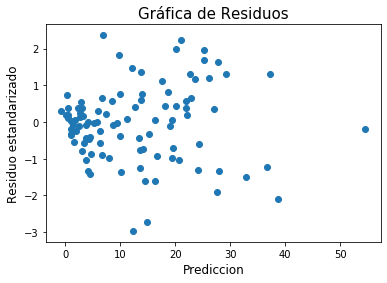

In [228]:
# Volver a ajustar el Modelo Final sin Outliers

reg = LinearRegression() # Create the Linear Regression estimator
result=reg.fit (data_train_withoutoutliers, label_train_withoutoutliers)  # Perform the fitting
print('Coeff and intercept: {} {}'.format(reg.coef_, reg.intercept_))

# P-values para decidir qué variables x son importantes para explicar y
import statsmodels.api as sm
mod = sm.OLS(label_train_withoutoutliers, data_train_withoutoutliers)
fitt = mod.fit()
p_values = fitt.summary2().tables[1]['P>|t|']
print(p_values)

#create instance of influence
influence = fitt.get_influence()

#standardized residuals
standardized_residuals = influence.resid_studentized_internal

#studentized residuals
studentized_residuals = influence.resid_studentized_external

# print(fitt.summary())
# print(fitt.predict())
# print(standardized_residuals)

plt.scatter(fitt.predict(), standardized_residuals)
plt.xlabel('Prediccion', fontsize=12)
plt.ylabel('Residuo estandarizado', fontsize=12)
plt.title('Gráfica de Residuos', fontsize=15)

Text(0.5, 1.0, 'Histograma Residuos Estandarizados')

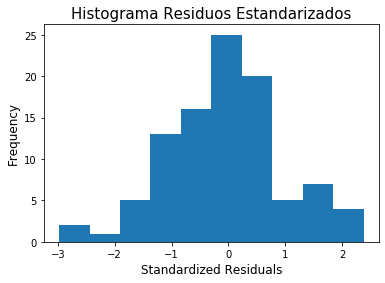

In [65]:
plt.hist(standardized_residuals)
plt.xlabel('Standardized Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histograma Residuos Estandarizados', fontsize=15)

Text(0.5, 1.0, 'Normal Q-Q Plot')

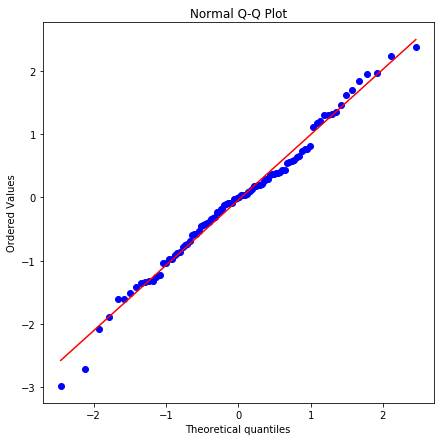

In [66]:
plt.figure(figsize=(7,7))
stats.probplot(standardized_residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

### Conclusión del Análisis de Residuos: Tras eliminación de los 2 outliers observados, el Análisis de Residuos puede ser considerado satisfactorio bajo un punto de vista estadístico.

### Evaluación Final Modelo "Medias"

In [ ]:
# Evaluación del Error Medio del último ajuste

print('RMSE of Linear Regression Model with Training Data: {0:.2f}'.format(np.sqrt(np.mean((reg.predict(data_train_withoutoutliers) - label_train_withoutoutliers)**2))))

print('RMSE of Linear Regression Model with Testing Data: {0:.2f}'.format(np.sqrt(np.mean((reg.predict(X_test) - y_test)**2))))

In [ ]:
# R2 del último ajuste

print('R2 Coefficient for Linear Regression Model with Training Data: {0:.3f}'.format(reg.score(data_train_withoutoutliers, label_train_withoutoutliers)))

print('R2 Coefficient for Linear Regression Model with Testing Data: {0:.3f}'.format(reg.score(X_test, y_test)))

### Conclusión: El coeficiente de determinación (R2) del modelo ajustado para las "medias" es alto (87,4%). Como el Análisis de Residuos también ha sido considerado satisfactorio, se valida el modelo bajo un punto de vista estadístico.

### LowMood  =  -0,85 + 0,78 Loneliness + 0,18 Stress + 0,04 News